# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('/content/train_house.csv')

In [3]:
# Drop variabel NaN
house = house.dropna(axis=1)

In [4]:
# Memisahkan data menjadi numerikal & kategorikal
categorical_colums = []
numerical_columns = []
for col in house.columns :
  if house[col].dtype == 'object':
    categorical_colums.append(col)
  else :
    numerical_columns.append(col)
print('Categorial Columns :', categorical_colums)
print('Numerical Columns :', numerical_columns)

Categorial Columns : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical Columns : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

Text(0.5, 1.0, 'Total Utilities')

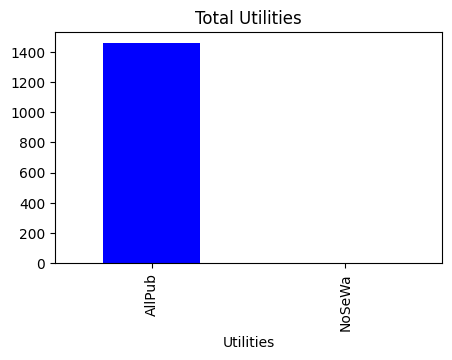

In [5]:
plt.figure(figsize=(5,3))
house['Utilities'].value_counts().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Total Utilities')

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Text(0.5, 1.0, 'Total HouseStyle')

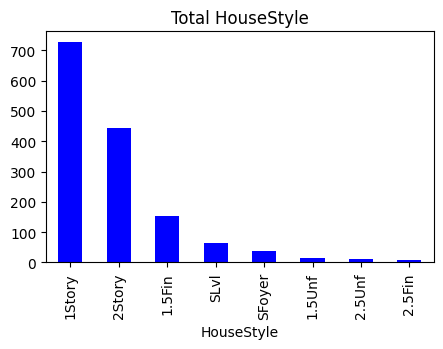

In [6]:
plt.figure(figsize=(5,3))
house['HouseStyle'].value_counts().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Total HouseStyle')

### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

Text(0.5, 1.0, 'Total ExterQual')

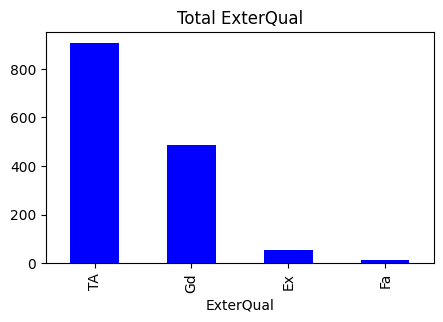

In [7]:
plt.figure(figsize=(5,3))
house['ExterQual'].value_counts().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Total ExterQual')

#### **Analisis tentang variabel kategorikal**

* Based on the graph above, it shows that the property facilities most preferred by buyers (Utilities) are All Publics Facilities (AllPub), the property styles (HouseStyle) that are more popular are 1story and 2story compared to the other 6 styles, for the quality of the exterior material (ExterQual) which is sold are dominated by Average/Typical quality.

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [8]:
print('Median :', stats.median(house['SalePrice']))
print('Mean :', stats.mean(house['SalePrice']))
print('Standard Deviation :', stats.stdev(house['SalePrice']))

Median : 163000.0
Mean : 180921.19589041095
Standard Deviation : 79442.5028828866


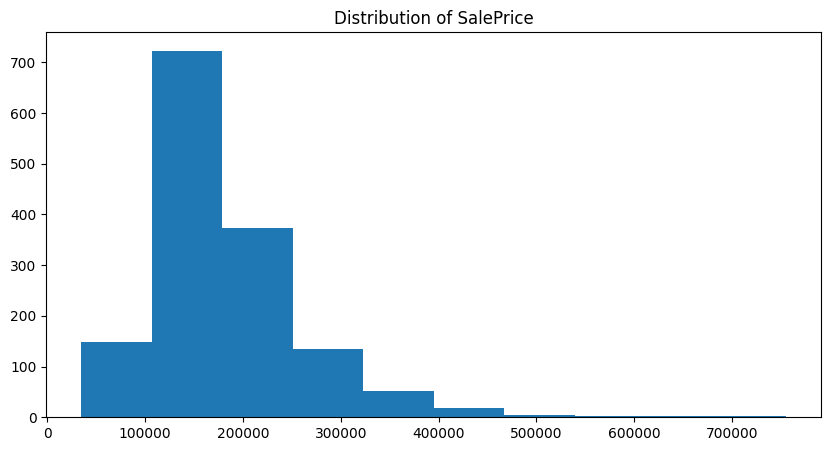

In [9]:
plt.figure(figsize=(10,5))
plt.hist(house['SalePrice'])
plt.title('Distribution of SalePrice')
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* The property price is dominated in ranging 100.000 - 200.000.
The majority of properties have sold between 100,000 and 200,000 suggests that this price range is the most active segment in the housing market.
* This may indicate that the highest demand lies, likely reflecting the affordability threshold for the middle-class buyer.
* Based on the histogram graph above, it shows that the 'SalePrice' data is not normally distributed, because the shape of the curve is skewed to the right and the mean value is greater than the Median.
* Therefore, the data needs to be transformed, so that it becomes normally distributed data.


### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [10]:
print('Median :', stats.median(house['GrLivArea']))
print('Mean :', stats.mean(house['GrLivArea']))
print('Standard Deviation :', stats.stdev(house['GrLivArea']))

Median : 1464.0
Mean : 1515.463698630137
Standard Deviation : 525.4803834232025


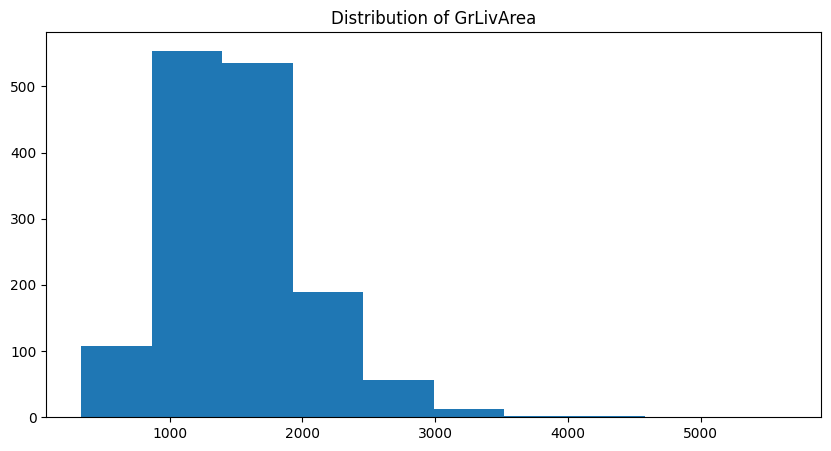

In [11]:
plt.figure(figsize=(10,5))
plt.hist(house['GrLivArea'])
plt.title('Distribution of GrLivArea')
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* The ground living area is dominated in ranging 1000 - 2000.
Homes with garage living areas ranging from 1000 to 2000 square feet likely appeal to a broad segment of the market.
* This range typically includes small to mid-sized single-family homes, which are popular among middle-income families, first-time homebuyers, and those looking to downsize.
* Houses within this ground living area range are often more affordable compared to larger homes. This makes them accessible to a larger portion of the population, driving demand and potentially stabilizing prices within this segment.
* Based on the histogram graph above, it shows that the 'GrlivArea' data is not normally distributed, because the shape of the curve is skewed to the right and the value of the mean is greater than the median.
* Therefore, the data needs to be transformed, so that the data becomes normally distributed.


### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [13]:
print('Median :', stats.median(house['GarageArea']))
print('Mean :', stats.mean(house['GarageArea']))
print('Standard Deviation :', stats.stdev(house['GarageArea']))

Median : 480.0
Mean : 472.9801369863014
Standard Deviation : 213.80484145338042


In [14]:
print(house['GarageArea'].value_counts())

GarageArea
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: count, Length: 441, dtype: int64


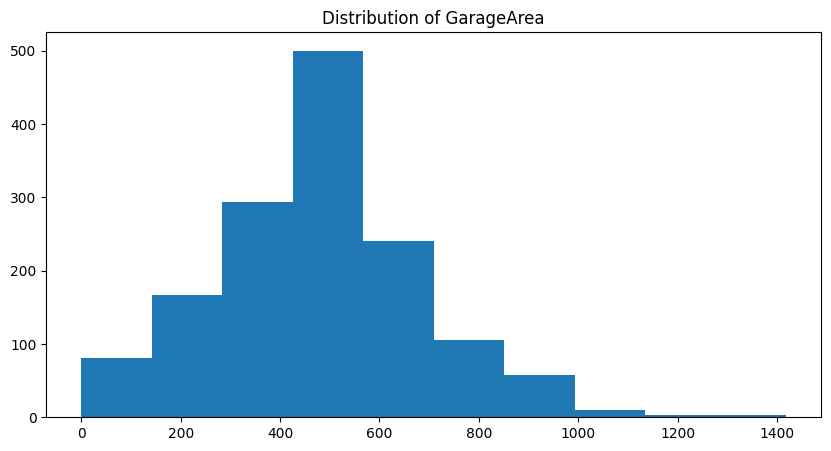

In [15]:
plt.figure(figsize=(10,5))
plt.hist(house['GarageArea'])
plt.title('Distribution of GarageArea')
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* The garage area is dominated between about 450 and 500 square feet
* It indicates that a garage with these widths possibly is more interesting to buyers because they seek enough space for their vehicle needs without needing too large a garage.
* Based on graph above, it shows that the data is normally distributed, because the graph is symmetrical, not skewed to the left/ righ, but there is an anomaly in the data because the value of the garage area should not be 0. It  possibly indicates that any error in the data records or the property doesn’t have any garage
* Therefore, the data needs data filtering to remove the 0 value



## Pemrosesan Data Variabel Numerikal

In [16]:
# Transformasi log-10 SalePrice
house['SalePrice'] = np.log(house['SalePrice'])
print('Median :', stats.median(house['SalePrice']))
print('Mean :', stats.mean(house['SalePrice']))
print('Standard Deviation :', stats.stdev(house['SalePrice']))

Median : 12.0015054797889
Mean : 12.024050901109383
Standard Deviation : 0.3994518682611643


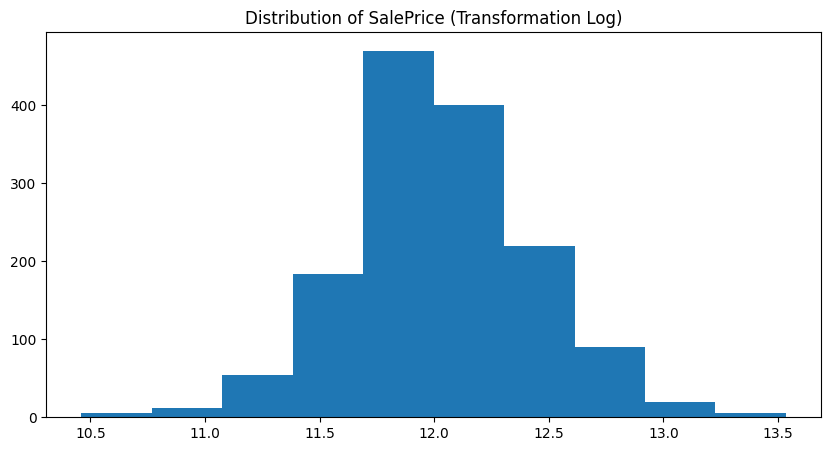

In [17]:
plt.figure(figsize=(10,5))
plt.hist(house['SalePrice'])
plt.title('Distribution of SalePrice (Transformation Log)')
plt.show()

In [18]:
# Transformasi log-10 GrLivArea
house['GrLivArea'] = np.log(house['GrLivArea'])
print('Median :', stats.median(house['GrLivArea']))
print('Mean :', stats.mean(house['GrLivArea']))
print('Standard Deviation :', stats.stdev(house['GrLivArea']))

Median : 7.288927694521257
Mean : 7.267774383311004
Standard Deviation : 0.3335504242692842


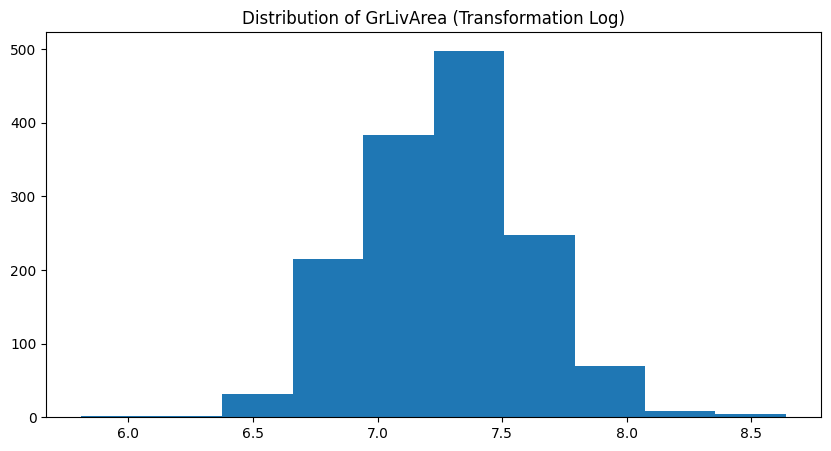

In [19]:
plt.figure(figsize=(10,5))
plt.hist(house['GrLivArea'])
plt.title('Distribution of GrLivArea (Transformation Log)')
plt.show()

In [20]:
# Menghilangkan nilai nol pada GarageArea
house = house[house['GarageArea'] > 0]
print('Median :', stats.median(house['GarageArea']))
print('Mean :', stats.mean(house['GarageArea']))
print('Standard Deviation :', stats.stdev(house['GarageArea']))

Median : 484
Mean : 500.76214648295866
Standard Deviation : 185.68051979433164


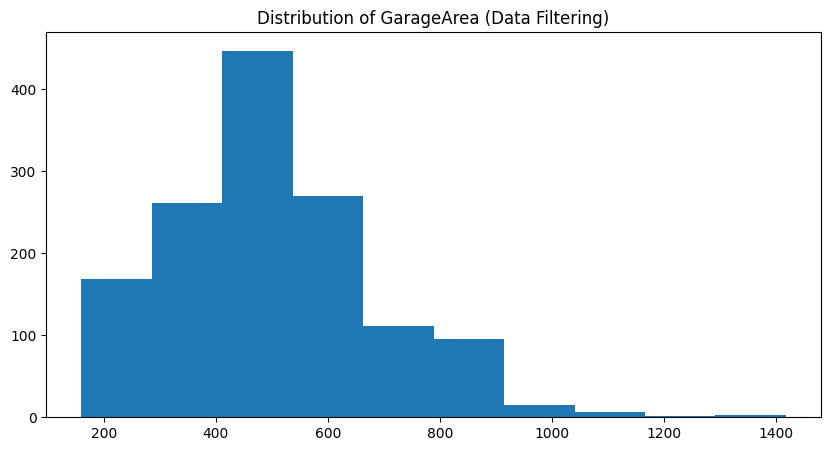

In [29]:
plt.figure(figsize=(10,5))
plt.hist(house['GarageArea'])
plt.title('Distribution of GarageArea (Data Filtering)')
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* After data transformation using log-10 on 'SalePrice' and 'GrLivArea' and data filtering to remove data with a value of 0 on 'GarageArea', it shows that the data is normally distributed, because the graph is symmetrical, not skewed to the left/ right and the mean and median values in the data are adjacent

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

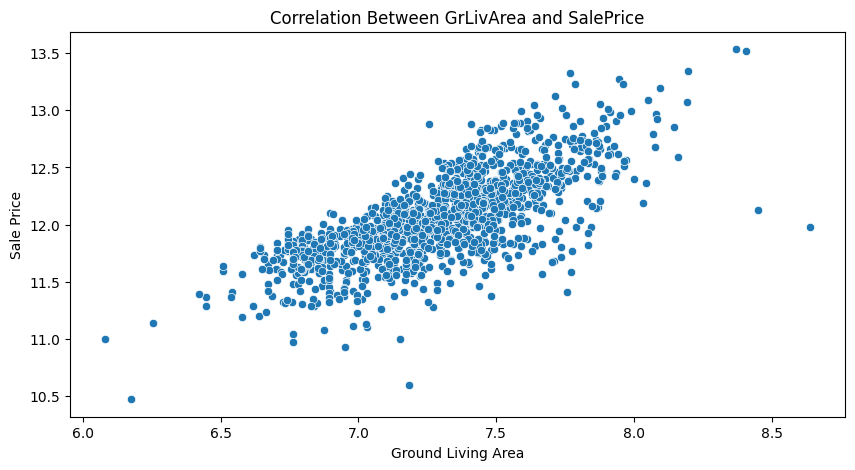

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house)
plt.title('Correlation Between GrLivArea and SalePrice')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.show()

# `GarageArea` dengan `SalePrice`

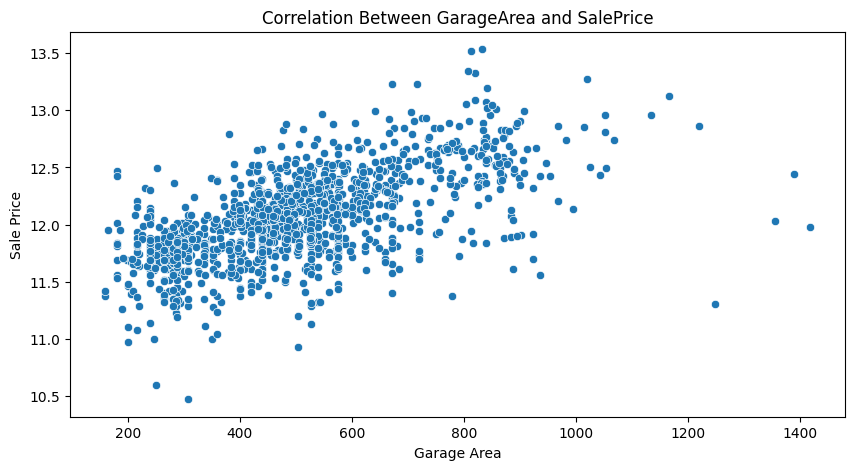

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='GarageArea', y='SalePrice', data=house)
plt.title('Correlation Between GarageArea and SalePrice')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* Based on the graph above, it shows that the trend line is increasing by a significant slope. It indicates that between GrLivArea with SalePrice and GarageArea and SalePrice have a relationship. Therefore, we can conclude that a property with a large ground and garage has a tendency of higher price
